# exp001
基礎的なEDA,順次コードを追加  
[Notion](https://www.notion.so/exp001-b1316641026e462d86cc6786c98b41f9?pvs=4)

In [15]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pydicom
%matplotlib inline
warnings.filterwarnings('ignore')

# リポジトリtopに移動
while os.path.basename(os.getcwd()) != 'rsna-2023':
    os.chdir('../')
    if os.getcwd() == '/':
        raise Exception('Could not find project root directory.')

from src.image_processing import windowing

In [3]:
df_train = pd.read_csv('data/rsna-2023-abdominal-trauma-detection/train.csv')
df_train_image_level = pd.read_csv('data/rsna-2023-abdominal-trauma-detection/image_level_labels.csv')
df_train_serirs_meta = pd.read_csv('data/rsna-2023-abdominal-trauma-detection/train_series_meta.csv')
# df_train_dicom_tags = pd.read_csv('data/rsna-2023-abdominal-trauma-detection/train_dicom_tags.parquet', engine='pyarrow')

In [4]:
df_train.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


In [5]:
for col in df_train.columns:
    if col in ['patient_id'] or 'healthy' in col:
        continue
    col_s = col.replace('_injury', '')
    print(f'{col_s: <14}: pos rate = {df_train[col].mean()*100:.3f}%')

bowel         : pos rate = 2.034%
extravasation : pos rate = 6.355%
kidney_low    : pos rate = 3.654%
kidney_high   : pos rate = 2.129%
liver_low     : pos rate = 8.230%
liver_high    : pos rate = 1.970%
spleen_low    : pos rate = 6.323%
spleen_high   : pos rate = 4.925%
any           : pos rate = 27.169%


In [6]:
df_train_image_level.head()

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [8]:
df_train_image_level["injury_name"].unique()

array(['Active_Extravasation', 'Bowel'], dtype=object)

In [9]:
len(df_train_image_level)

12029

patient_id - A unique ID code for each patient.  
series_id - A unique ID code for each scan.  
aortic_hu - The volume of the aorta in hounsfield units. This acts as a reliable proxy for when the scan was. For a multiphasic CT scan, the higher value indicates the late arterial phase.  
incomplete_organ - True if one or more organs wasn't fully covered by the scan. This label is only provided for the train set.  

In [11]:
df_train_serirs_meta.head()

,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0


In [19]:
df_train_serirs_meta[df_train_serirs_meta["series_id"]==137]

,patient_id,series_id,aortic_hu,incomplete_organ
2957,46904,137,651.0,0


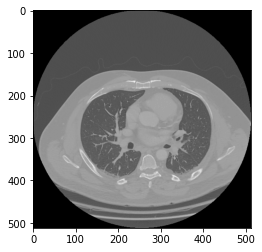

In [14]:
# dicom画像の読み込み・表示
path = 'data/rsna-2023-abdominal-trauma-detection/train_images/19/14374/229.dcm'
dcm = pydicom.dcmread(path)
img = dcm.pixel_array
plt.imshow(img, cmap='gray')

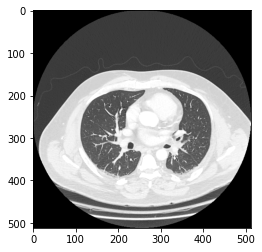

In [16]:
img_lung_windowing = windowing(img, wl=-600, ww=1500, mode="uint8")
plt.imshow(img_lung_windowing, cmap="gray")